### Clustering Assigment - categorise the countries using some socio-economic and health factors that determine the overall development of the country

Column             Name	Description

- **country**	  -         Name of the country
- **child_mort** -       Death of children under 5 years of age per 1000 live births
- **exports**	-           Exports of goods and services per capita. Given as %age of the GDP per capita
- **health**	-           Total health spending per capita. Given as %age of GDP per capita
- **imports**	-           Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income**	-           Net income per person
- **Inflation**	  -     The measurement of the annual growth rate of the Total GDP
- **life_expec**	-       The average number of years a new born child would live if the current mortality patterns are to remain the same
- **total_fer**	   -    The number of children that would be born to each woman if the current age-fertility rates remain the same.
- **gdpp**	     -      The GDP per capita. Calculated as the Total GDP divided by the total population.

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')


In [224]:
country = pd.read_csv('Country-data.csv',  sep=",", encoding="ISO-8859-1", header=0)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [225]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [226]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [227]:
country.country.value_counts()

Cambodia      1
Finland       1
Guinea        1
Tunisia       1
Libya         1
             ..
Kazakhstan    1
Zambia        1
Malta         1
Nepal         1
Norway        1
Name: country, Length: 167, dtype: int64

In [228]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [229]:
country.shape

(167, 10)

### EDA


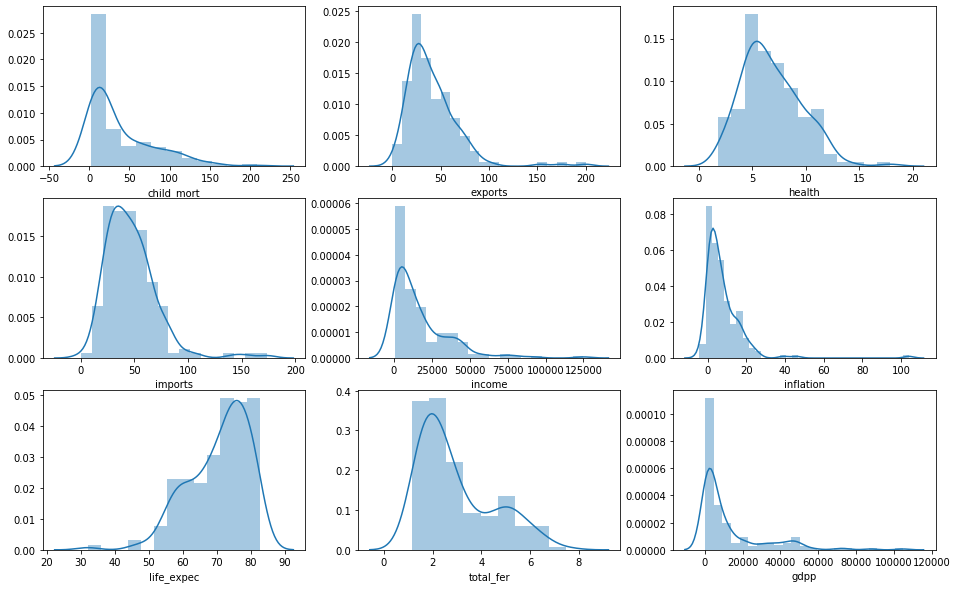

In [230]:
plt.figure(figsize = (16,10))
feature = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country[i[1]])

For cluster profiling: GDP, income, child mortality

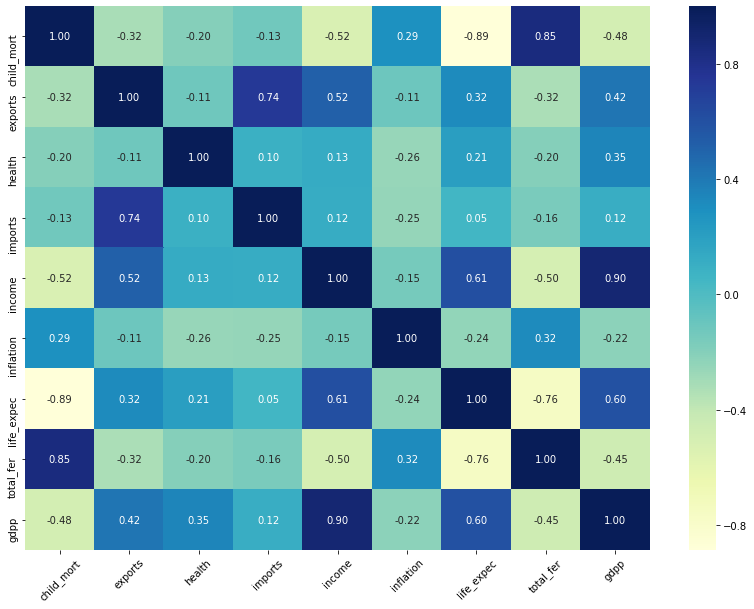

In [231]:
# lets see the correlation between the variables

plt.figure(figsize = (14,10))
ay = sns.heatmap(country.corr(), 
                 annot=True,fmt = '.2f' , cmap="YlGnBu")
bottom, top = ay.get_ylim()
ay.set_ylim(bottom +0.5, top-0.5)
plt.xticks(rotation = 45)
plt.show()


### Inferences:
    - income and GDP are highly related(as expected)
    - life expectency is also positively related to GDP
    - income is also showing a good relation with life expectency

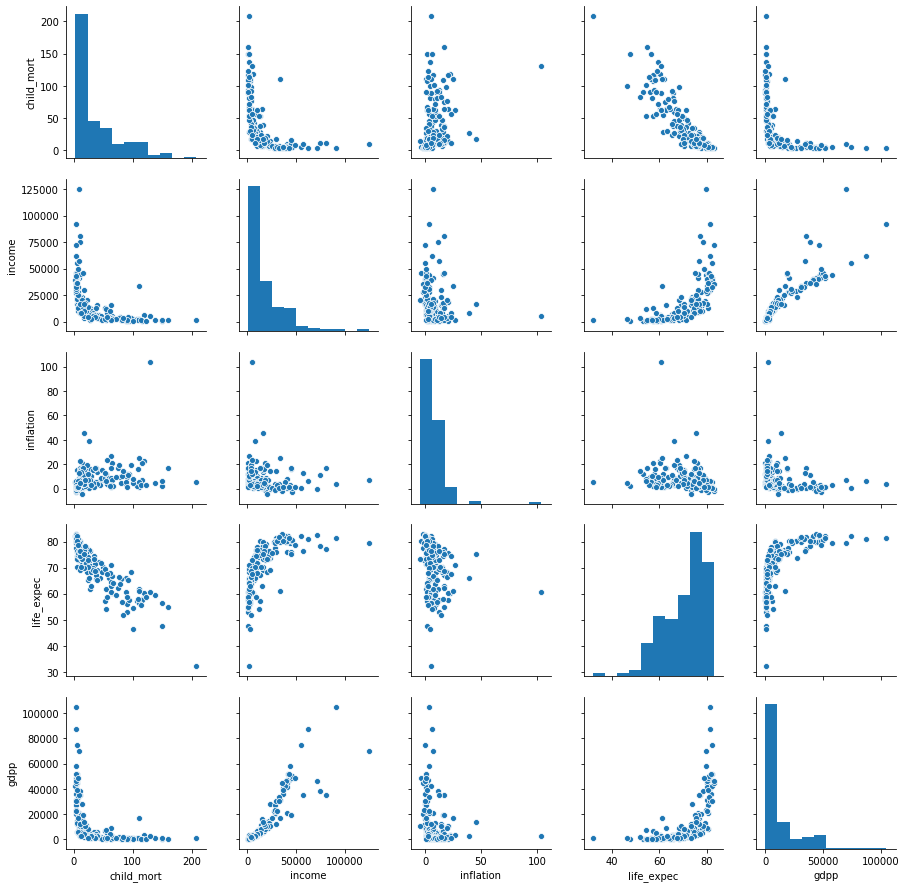

In [232]:
# Bivariate Analysis
sns.pairplot(country[['child_mort','income',
       'inflation', 'life_expec',  'gdpp']])

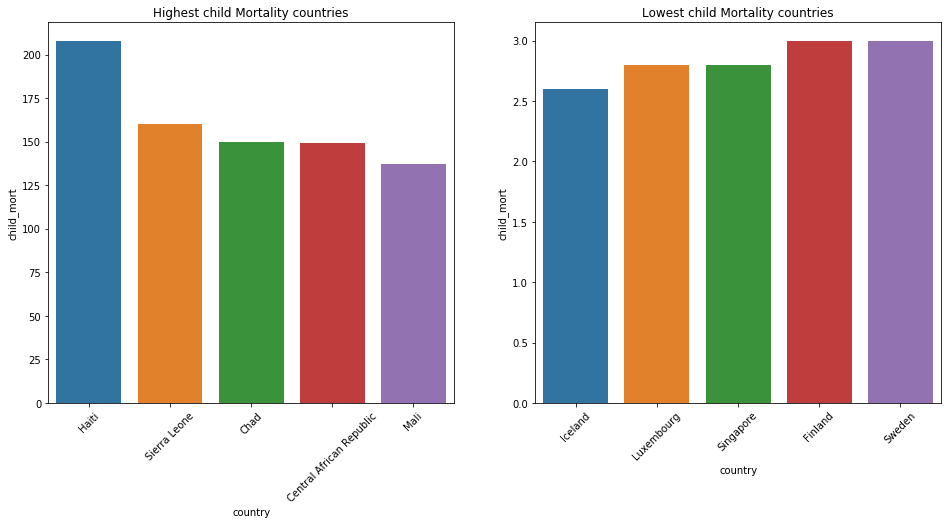

In [233]:
# country vs child_mort

plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
top5_child_mort = country[['country','child_mort']].sort_values('child_mort',ascending=False).head(5)
sns.barplot(x='country',y='child_mort',data=top5_child_mort)
plt.xticks(rotation=45)
plt.title('Highest child Mortality countries')

plt.subplot(1,2,2)
bottom5_child_mort = country[['country','child_mort']].sort_values('child_mort',ascending=True).head(5)
sns.barplot(x='country',y='child_mort',data=bottom5_child_mort)
plt.xticks(rotation=45)
plt.title('Lowest child Mortality countries')

plt.show()

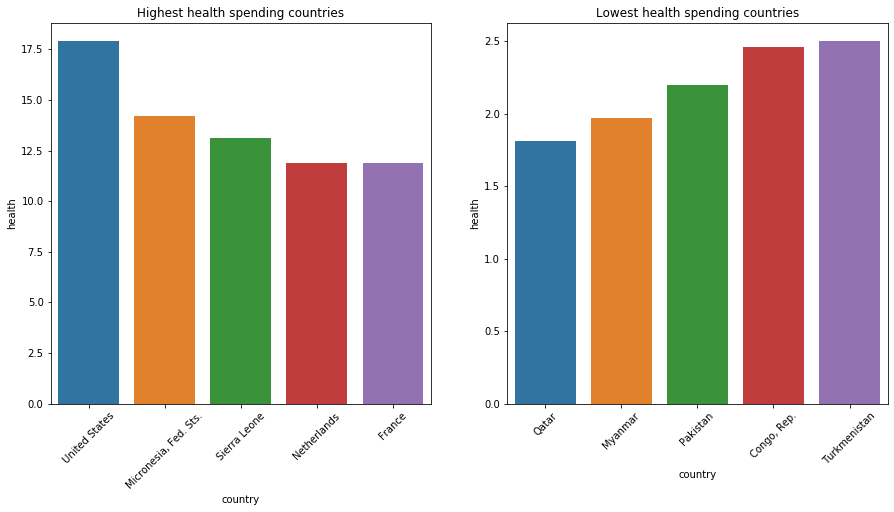

In [234]:
# country vs health

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
top10_health = country[['country','health']].sort_values('health',ascending=False).head(5)
sns.barplot(x='country',y='health',data=top10_health)
plt.xticks(rotation=45)
plt.title('Highest health spending countries')

plt.subplot(1,2,2)
bottom10_health = country[['country','health']].sort_values('health',ascending=True).head(5)
sns.barplot(x='country',y='health',data=bottom10_health)
plt.xticks(rotation=45)
plt.title('Lowest health spending countries')

plt.show()

### Inferences:
    - 5 Countries with highest spend on health are United States, Micronesia,Fed.Sts., Sierra Leone, Netherlands, France
    - 5 Countries with lowest spend on health are Qatar, Myanmar, Pakistan, Congo, Rep, Turkmenistan

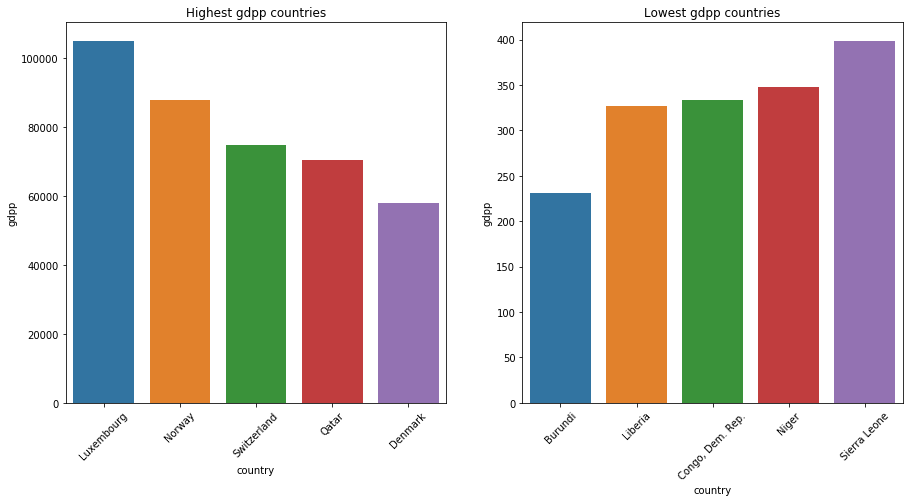

In [235]:
# country vs GDP

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
top5_gdpp = country[['country','gdpp']].sort_values('gdpp',ascending=False).head(5)
sns.barplot(x='country',y='gdpp',data=top5_gdpp)
plt.xticks(rotation=45)
plt.title('Highest gdpp countries')

plt.subplot(1,2,2)
bottom5_gdpp = country[['country','gdpp']].sort_values('gdpp',ascending=True).head(5)
sns.barplot(x='country',y='gdpp',data=bottom5_gdpp)
plt.xticks(rotation=45)
plt.title('Lowest gdpp countries')

plt.show()

### Inferences:
    - 5 Countries with Highest GDP are Luxembourg, Norway, Switzerland, Qatar, Denmark.
    - 5 Countries with Lowest GDPP are Burundi, Liberia, Congo,Dem.Rep., Niger, Sierra Leone

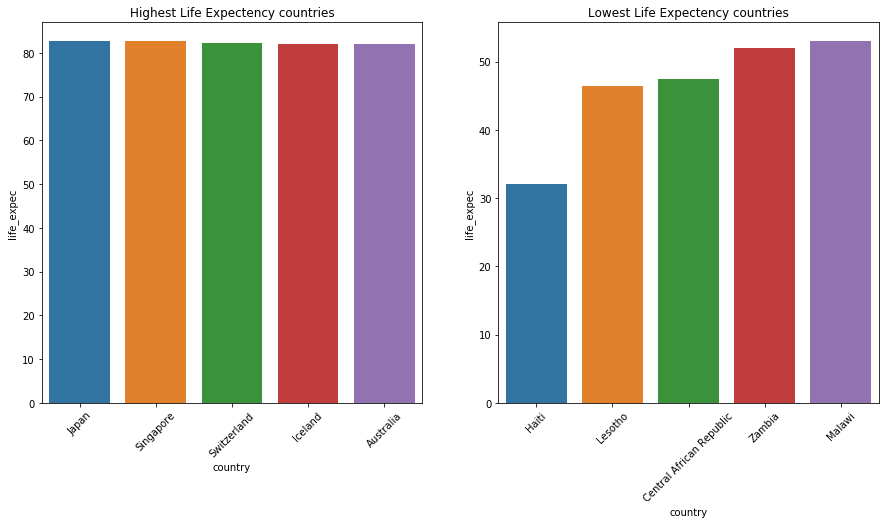

In [236]:
# country vs life_expec

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
top5_life = country[['country','life_expec']].sort_values('life_expec',ascending=False).head(5)
sns.barplot(x='country',y='life_expec',data=top5_life)
plt.xticks(rotation=45)
plt.title('Highest Life Expectency countries')

plt.subplot(1,2,2)
bottom5_life = country[['country','life_expec']].sort_values('life_expec',ascending=True).head(5)
sns.barplot(x='country',y='life_expec',data=bottom5_life)
plt.xticks(rotation=45)
plt.title('Lowest Life Expectency countries')

plt.show()

### Inferences:
    - Top 5 countries are Japan, Singapore, Switzerland, Iceland, Australia
    - Bottom 5 countries are Haiti, Lesotho, Central African Republic, Zambia, Malawi
    - Country with lowest Life expectency is Haiti and Country with Highest Life Expectency is Japan.

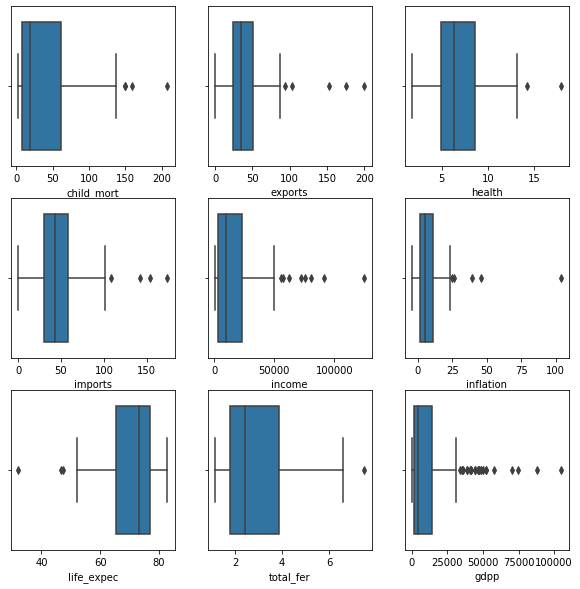

In [237]:
#look for outliers
plt.figure(figsize = (10,10))
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])

#### As the no. of records are less, we cannot drop the records so capping the outliers is a better option

- i will try with 99 percentile


155.54320000000004
13.227160000000001
143.38720000000004
81883.16000000002
39.97452000000002
82.2578
6.554624
76125.92000000003


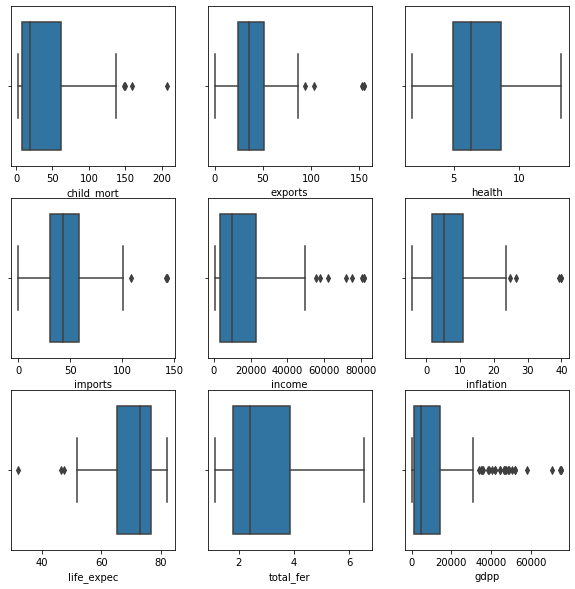

In [263]:
#capping upper range values for all the variables expect child_mort
upper_capping= ['exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(upper_capping):
    q4 = country[i[1]].quantile(0.99)
    country[i[1]][country[i[1]]>= q4] = q4


#look for outlier Corrections
plt.figure(figsize = (10,10))
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])


In [239]:
# lower capping for child_mort
q1 = country['child_mort'].quantile(0.01)
country['child_mort'][country['child_mort']<=q1] = q1
country.child_mort.describe()

count    167.000000
mean      38.271257
std       40.327869
min        2.800000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

In [240]:
# hopkins statistics 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1] # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(X.values)
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis =0),np.amax(X,axis = 0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H =0
    
    return H


In [241]:
hopkins_Score=[]
for i in range(0,10):
    a = hopkins(country.drop('country', axis =1))
    hopkins_Score.append(a)
    
average_hopkin_score = sum(hopkins_Score)/len(hopkins_Score)
print(average_hopkin_score)

0.9121909209313314


As the score is above 80 it is a very suitable dataset for clustering

### Scaling

In [242]:
scaler = StandardScaler()
df1= scaler.fit_transform(df)

In [243]:
df1 = pd.DataFrame(df1, columns = country.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-1.199279,0.301239,-0.076771,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538993,-0.498069,-0.088966,0.083204,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272870,-0.092925,-0.990604,-0.660465,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007831,0.838126,-1.490672,-0.163244,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695682,0.183663,-0.285963,0.528541,0.125254,-0.764618,0.705262,-0.543736,-0.032042


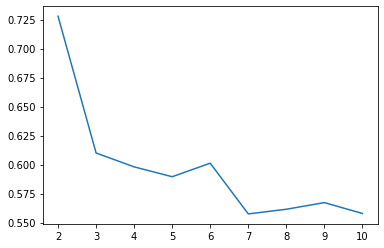

In [244]:
df = country.drop('country', axis=1)
#silhoutte score

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(df)
    ss.append([k,silhouette_score(df,kmeans.labels_)])
temp = pd.DataFrame(ss)
plt.plot(temp[0],temp[1])

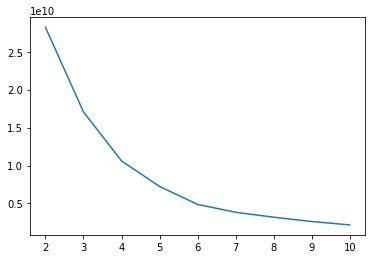

In [245]:
#Curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df)
    ssd.append([k,kmean.inertia_])
temp = pd.DataFrame(ssd)
plt.plot(temp[0],temp[1])

In [246]:
for num_clusters in range(2,11):
    
    #initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    #silhouette score
    silhouette_avg = silhouette_score(df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2, the silhouette score is 0.7278886280364144
For n_clusters=3, the silhouette score is 0.6099814439505343
For n_clusters=4, the silhouette score is 0.5980106562668621
For n_clusters=5, the silhouette score is 0.5889846507842804
For n_clusters=6, the silhouette score is 0.6011741748155409
For n_clusters=7, the silhouette score is 0.5569676734884919
For n_clusters=8, the silhouette score is 0.5642786402469491
For n_clusters=9, the silhouette score is 0.567116019337197
For n_clusters=10, the silhouette score is 0.5495709525490448


In [247]:
# k=3  looks like a good choice
kmean = KMeans(n_clusters = 3,random_state=100)
kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [248]:
# Cluster adding

cluster_no = pd.DataFrame(kmean.labels_, columns = ['cluster_no'])
country_kmean = country.copy()
country_kmean = pd.concat([country_kmean,cluster_no],axis=1)
country_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


In [249]:
country_kmean.cluster_no.value_counts()

2    109
1     35
0     23
Name: cluster_no, dtype: int64

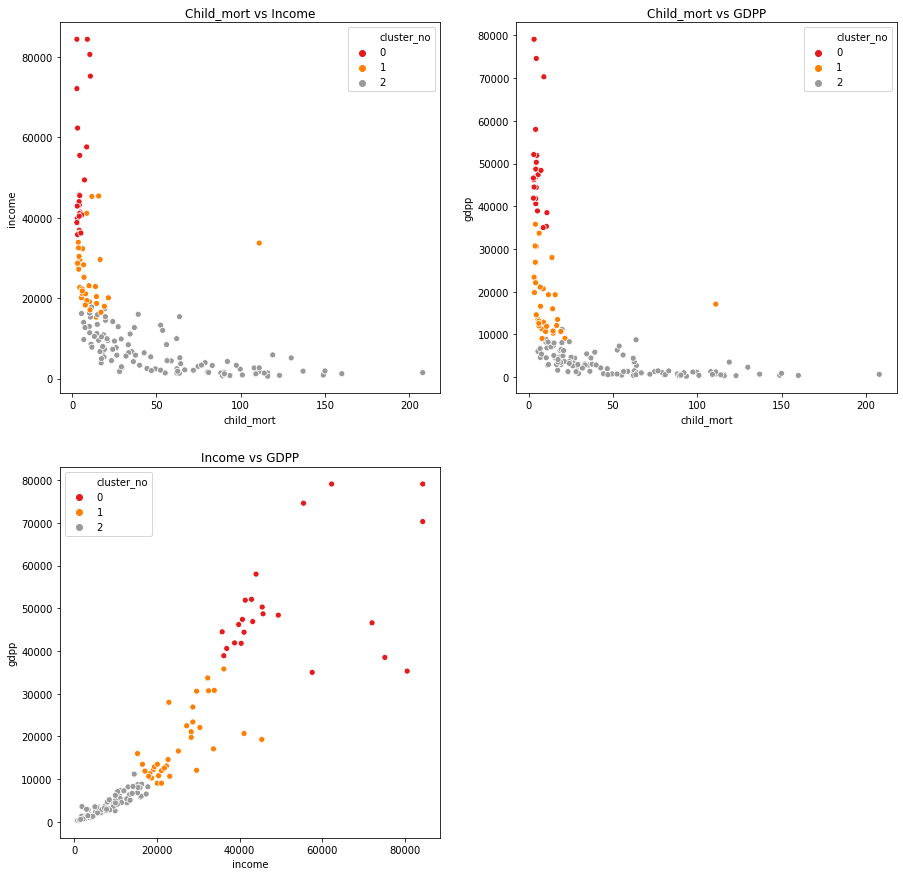

In [250]:
# Plot sactter 
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_no', data=country_kmean, palette='Set1')
plt.title('Child_mort vs Income')

plt.subplot(2,2,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_no', data=country_kmean, palette='Set1')
plt.title('Child_mort vs GDPP')

plt.subplot(2,2,3)
sns.scatterplot(x='income', y='gdpp', hue='cluster_no', data=country_kmean, palette='Set1')
plt.title('Income vs GDPP')

plt.show()

### Cluster Profiling

In [251]:
country_kmean.drop(['country', 'exports', 'health', 'imports','inflation', 'life_expec', 'total_fer'],axis=1).groupby('cluster_no').mean()

,child_mort,income,gdpp
cluster_no,,,
0,5.091304,51906.434783,50455.478261
1,11.888571,26125.714286,18135.428571
2,53.744037,6485.899083,3074.990826


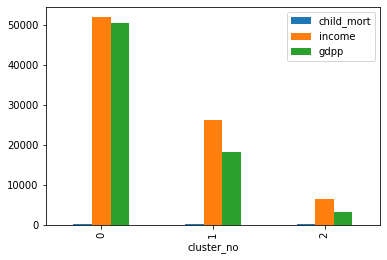

In [252]:
country_kmean.drop(['country', 'exports', 'health', 'imports','inflation', 'life_expec', 'total_fer'],axis=1).groupby('cluster_no').mean().plot(kind= 'bar')
plt.show()

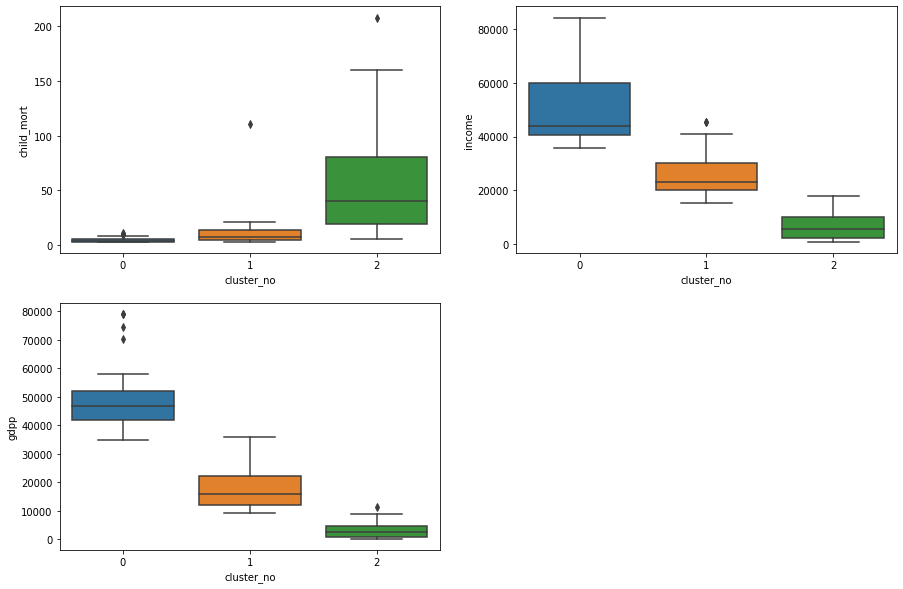

In [253]:
#plot boxplot

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='cluster_no',y='child_mort',data=country_kmean)

plt.subplot(2,2,2)
sns.boxplot(x='cluster_no',y='income',data=country_kmean)

plt.subplot(2,2,3)
sns.boxplot(x='cluster_no',y='gdpp',data=country_kmean)

plt.show()

### Inference
     - above plots we conclude that in cluster-2, there is high child_mort, low income and low gdpp.
     I need 5 top countries from cluster 2 as they will need help

In [254]:
country_kmean[country_kmean['cluster_no']==2].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220.0,17.20,55.0,5.2000,399.0,2
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.39,56.5,6.5636,897.0,2
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.01,47.5,5.2100,446.0,2
97,Mali,137.0,22.8,4.98,35.1,1870.0,4.37,59.5,6.5500,708.0,2


### Hierarchical clustering

In [255]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [257]:
# dataframe for hir clustering
country_hir = country.copy()
country_hir.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


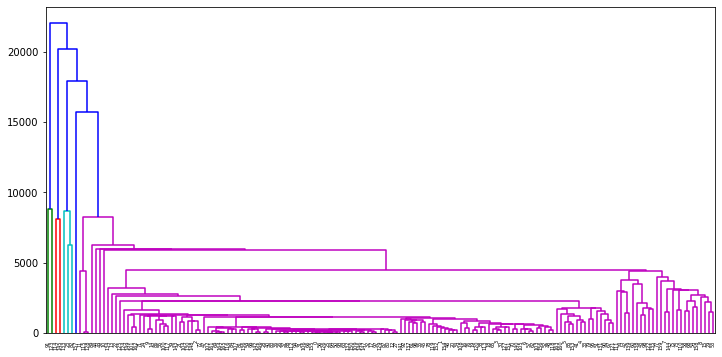

In [258]:
#single Linkage
plt.figure(figsize = (12,6))
merging = linkage(df,method='single',metric='euclidean')
dendrogram(merging)
plt.show()

- Can easily see 4 clusters 

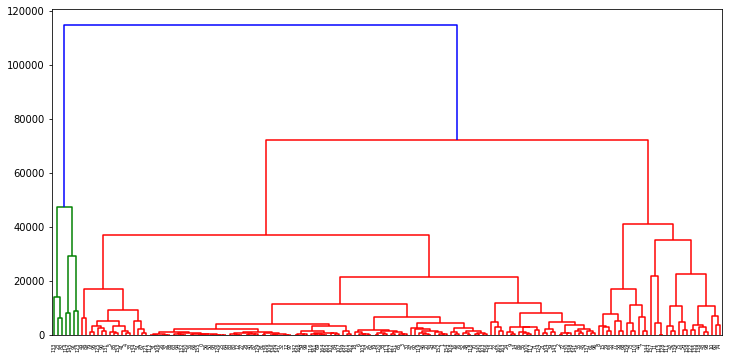

In [259]:
#Complete Linkage
plt.figure(figsize = (12,6))
merging1 = linkage(df,method='complete',metric='euclidean')
dendrogram(merging1)
plt.show()

In [270]:
# Lets cut

cluster_labels = cut_tree(merging1, n_clusters=4).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [271]:
#assign cluster labels

country_hir['Cluster_label'] = cluster_labels
country_hir.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_label
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [272]:
#checking the labels
country_hir.Cluster_label.value_counts()

0    129
1     31
3      4
2      3
Name: Cluster_label, dtype: int64

### Cluster Profiling

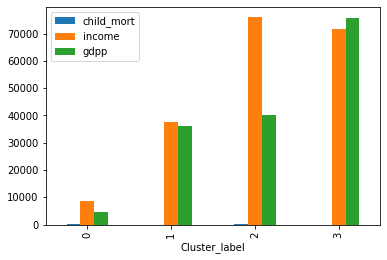

In [276]:
country_hir.drop(['country', 'exports', 'health', 'imports','inflation', 'life_expec', 'total_fer'],axis=1).groupby('Cluster_label').mean().plot(kind='bar')

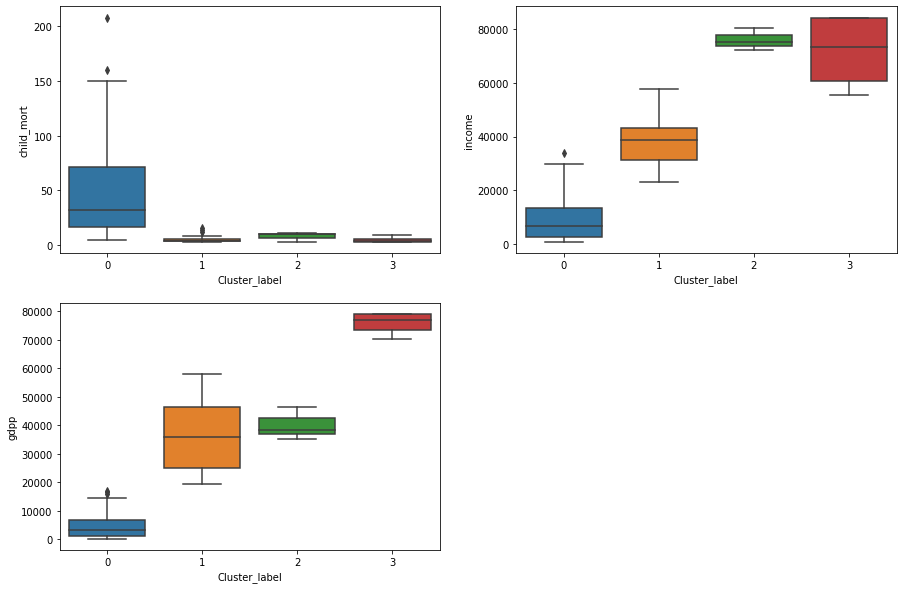

In [279]:
#plot boxplot

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='Cluster_label',y='child_mort',data=country_hir)

plt.subplot(2,2,2)
sns.boxplot(x='Cluster_label',y='income',data=country_hir)

plt.subplot(2,2,3)
sns.boxplot(x='Cluster_label',y='gdpp',data=country_hir)

plt.show()

### Cluster label 0 is the cluster from which we can get the top 5 countries as the child_mort is high and income, GDPP is lowest for this cluster

In [281]:
country_hir[country_hir['Cluster_label']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_label
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.45,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220.0,17.20,55.0,5.2000,399.0,0
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.39,56.5,6.5636,897.0,0
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.01,47.5,5.2100,446.0,0
97,Mali,137.0,22.8,4.98,35.1,1870.0,4.37,59.5,6.5500,708.0,0


### Five country that should be provided with help is Haiti, Sierra Leone, Chad, Central African Republic, Mali from both types of clustering techniques
